In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Read data

<p> Latest confirmed data


In [6]:
df= pd.read_csv('2019_nCoV_20200121_20200128.csv')
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/28/2020 18:00,3554.0,NaN,80.0,125.0
1,Guangdong,Mainland China,1/28/2020 18:00,207.0,NaN,4.0,NaN
2,Zhejiang,Mainland China,1/28/2020 18:00,173.0,NaN,3.0,NaN
3,Henan,Mainland China,1/28/2020 18:00,168.0,NaN,NaN,1.0
4,Hunan,Mainland China,1/28/2020 18:00,143.0,NaN,NaN,NaN


In [7]:
df.shape

(669, 7)

In [8]:
df.isnull().sum()

Province/State    125
Country/Region      0
Last Update         0
Confirmed          30
Suspected         581
Recovered         578
Death             605
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 7 columns):
Province/State    544 non-null object
Country/Region    669 non-null object
Last Update       669 non-null object
Confirmed         639 non-null float64
Suspected         88 non-null float64
Recovered         91 non-null float64
Death             64 non-null float64
dtypes: float64(4), object(3)
memory usage: 36.7+ KB


# Prepare Data

In [12]:
df['Last Update'].unique()

array(['1/28/2020 18:00', '1/28/2020 13:00', '1/27/2020 20:30',
       '1/27/2020 19:00', '1/27/2020 9:00', '1/26/2020 23:00',
       '1/26/2020 11:00 AM', '1/25/2020 10:00 PM', '1/25/2020 12:00 PM',
       '1/25/2020 12:00 AM', '1/24/2020 12:00 PM', '1/24/2020 4:00 PM',
       '1/24/2020 12:00 AM', '1/23/20 12:00 PM', '1/22/2020 12:00',
       '1/21/2020'], dtype=object)

Get last updated data

In [17]:
df = df[df['Last Update'] == '1/28/2020 18:00']

In [18]:
df.shape

(52, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
Province/State    42 non-null object
Country/Region    52 non-null object
Last Update       52 non-null object
Confirmed         52 non-null float64
Suspected         0 non-null float64
Recovered         10 non-null float64
Death             7 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.2+ KB


In [19]:
df['Country/Region'].unique()

array(['Mainland China', 'Taiwan', 'Hong Kong', 'Macau', 'United States',
       'Japan', 'Thailand', 'South Korea', 'Singapore', 'Vietnam',
       'France', 'Nepal', 'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka',
       'Australia', 'Germany'], dtype=object)

# Rname Countries

In [20]:
df.replace('Mainland China', 'China', inplace=True)
df.replace('Hong Kong', 'China', inplace=True)
df.replace('Macau', 'China', inplace=True)

/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


# Handle NaNs

In [22]:
df['Province/State'].fillna('Unknown', inplace=True)
df['Suspected'].fillna(0, inplace=True)
df['Recovered'].fillna(0, inplace=True)
df['Death'].fillna(0, inplace=True)

/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
Province/State    52 non-null object
Country/Region    52 non-null object
Last Update       52 non-null object
Confirmed         52 non-null float64
Suspected         52 non-null float64
Recovered         52 non-null float64
Death             52 non-null float64
dtypes: float64(4), object(3)
memory usage: 3.2+ KB


# Group Data

In [39]:
df1 = df.groupby(['Country/Region']).agg('sum').reset_index()
df1

,Country/Region,Confirmed,Suspected,Recovered,Death
0,Australia,5.0,0.0,0.0,0.0
1,Cambodia,1.0,0.0,0.0,0.0
2,Canada,2.0,0.0,0.0,0.0
3,China,5509.0,0.0,101.0,131.0
4,France,4.0,0.0,0.0,0.0
5,Germany,4.0,0.0,0.0,0.0
6,Japan,7.0,0.0,1.0,0.0
7,Malaysia,4.0,0.0,0.0,0.0
8,Nepal,1.0,0.0,0.0,0.0
9,Singapore,7.0,0.0,0.0,0.0


In [45]:
df2 = df.groupby(['Province/State']).agg('sum').reset_index()
df2

,Province/State,Confirmed,Suspected,Recovered,Death
0,Anhui,106.0,0.0,0.0,0.0
1,Arizona,1.0,0.0,0.0,0.0
2,Bavaria,4.0,0.0,0.0,0.0
3,Beijing,91.0,0.0,4.0,1.0
4,British Columbia,1.0,0.0,0.0,0.0
5,California,2.0,0.0,0.0,0.0
6,China,15.0,0.0,0.0,0.0
7,Chongqing,132.0,0.0,0.0,0.0
8,Fujian,80.0,0.0,0.0,0.0
9,Gansu,19.0,0.0,0.0,0.0


# Data Visualization

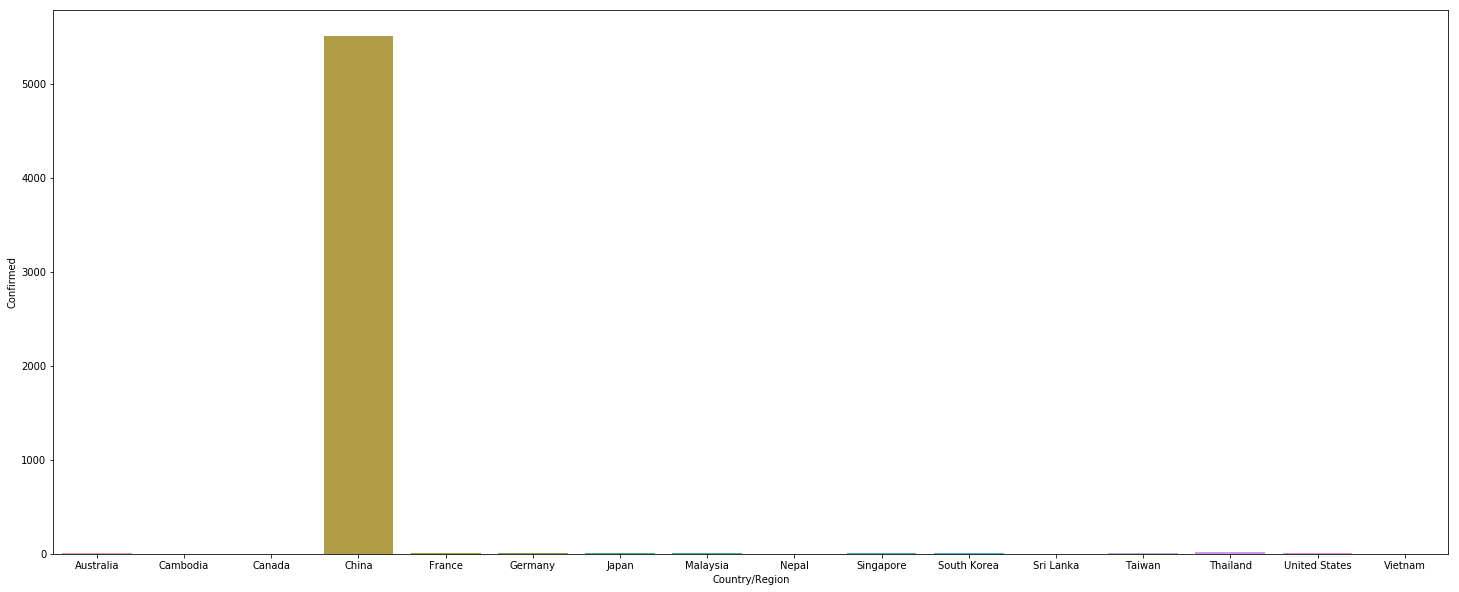

In [94]:
plt.figure(figsize=(25,10))
sns.barplot(x='Country/Region', y='Confirmed', data = df1)

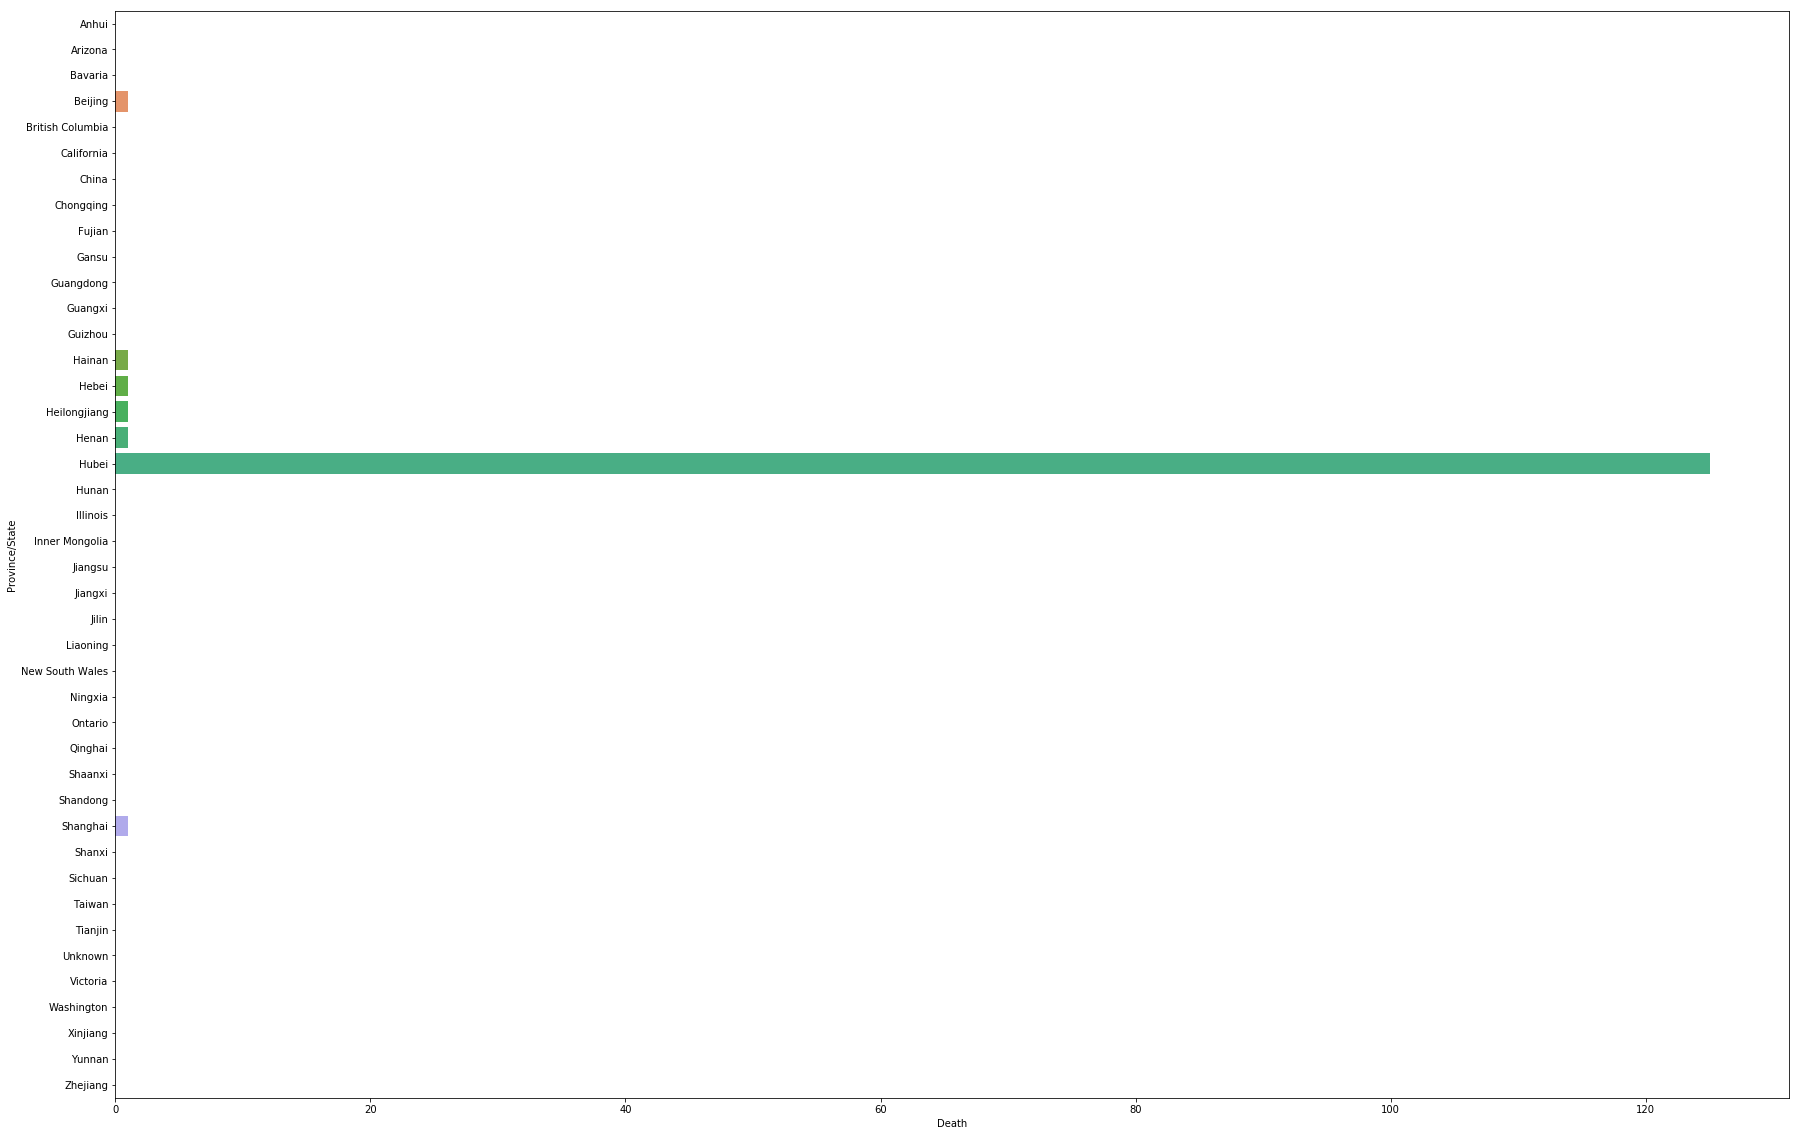

In [49]:
plt.figure(figsize=(30,20))
sns.barplot(x='Death', y='Province/State', data = df2)

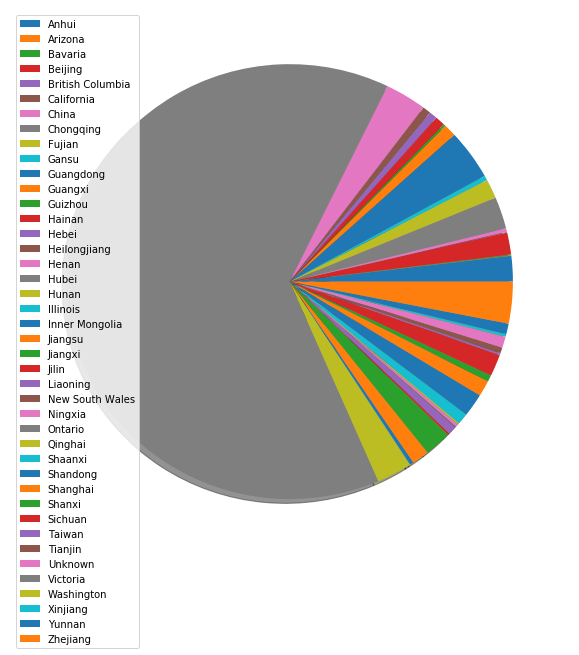

In [82]:
plt.figure(figsize = (10,10))
pie = plt.pie(df2['Confirmed'], shadow=True)
plt.legend(df2['Province/State'], loc = 0)


<h5> Not the end. Will update whenever new data is available.